# Decomposing Prediction

This is an example to show decomposing prediction from orbit models.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from orbit.models.dlt import DLTMAP, DLTFull
from orbit.diagnostics.plot import plot_predicted_components
from orbit.utils.dataset import load_iclaims

## Data

First, let's load the example data set.

In [2]:
df = load_iclaims()
df[['claims', 'trend.unemploy', 'trend.filling', 'trend.job']] = \
    np.log(df[['claims', 'trend.unemploy', 'trend.filling', 'trend.job']])
date_col='week'
response_col='claims'

Then we will train the model and use `decompose=True` within `.predict()` to decompose the prediction. After that, we can use `plot_predicted_components` to visualize the decomposition. This works for both MAP and MCMC estimation.

## MAP Estimation

In [3]:
dlt = DLTMAP(
    response_col=response_col,
    regressor_col=['trend.unemploy', 'trend.filling', 'trend.job'],
    date_col=date_col,
    seasonality=52,
    seed=2020,
    global_trend_option='linear',
)
dlt.fit(df)
predicted_df = dlt.predict(df=df, decompose=True)

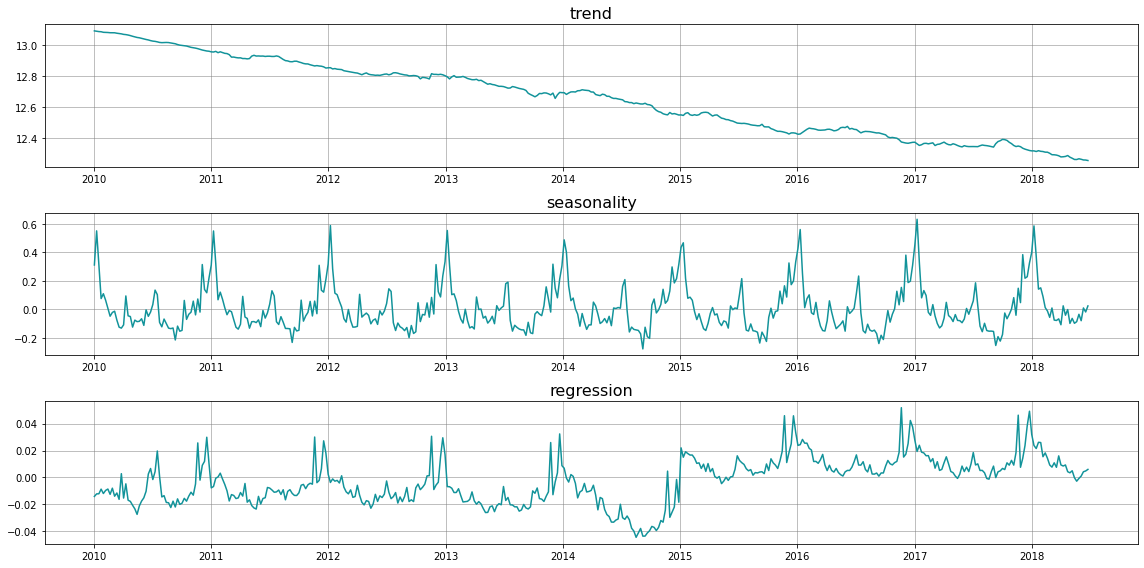

In [4]:
plot_predicted_components(predicted_df, date_col)

## MCMC Estimation

In [5]:
dlt = DLTFull(
    response_col=response_col,
    regressor_col=['trend.unemploy', 'trend.filling', 'trend.job'],
    date_col=date_col,
    seasonality=52,
    seed=2020,
    prediction_percentiles=[5,95],
)
dlt.fit(df)
predicted_df = dlt.predict(df=df, decompose=True)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


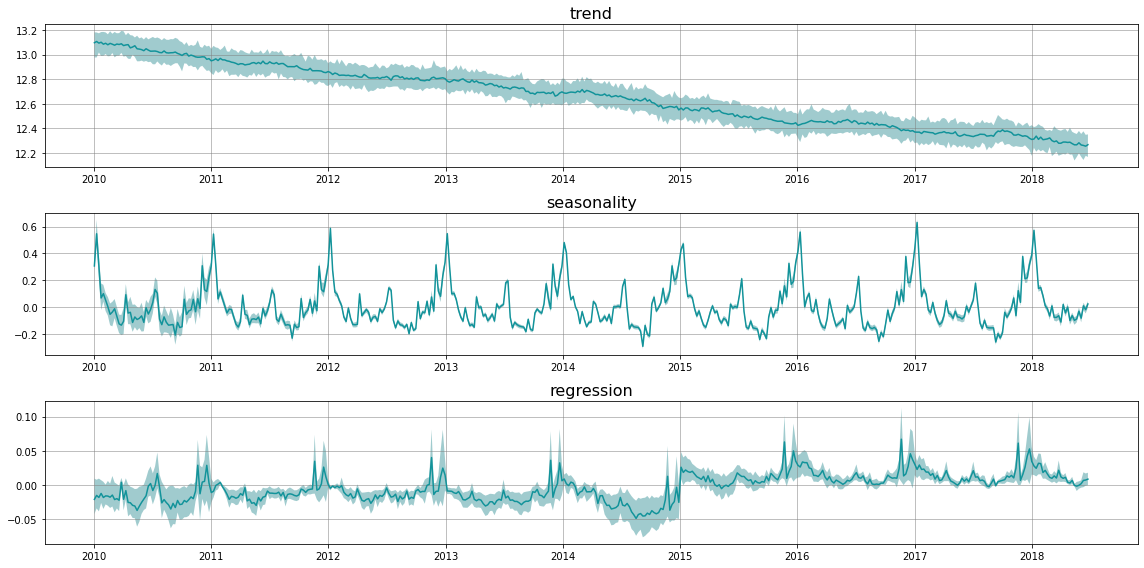

In [6]:
plot_predicted_components(predicted_df, date_col)